In [1]:
import os

data_dir = "/home/Yi/seeds/train"
subdirs = os.listdir(data_dir)
print(subdirs)

['Common wheat', 'Scentless Mayweed', 'Charlock', 'Small-flowered Cranesbill', 'Fat Hen', 'Common Chickweed', 'Shepherds Purse', 'Loose Silky-bent', 'Cleavers', 'Sugar beet', 'Maize', 'Black-grass']


In [3]:
import glob
images = glob.glob(data_dir + '/*/*')
print(len(images))

4750


In [6]:
from tqdm import tqdm
import cv2
import pickle

path_size = {}
for path in tqdm(images):
    x = cv2.imread(path)
    path_size[path] = (x.shape[1],x.shape[0])

100%|██████████| 4750/4750 [01:11<00:00, 66.61it/s] 


FileNotFoundError: [Errno 2] No such file or directory: '/home/fan/seeds/train../train.path_size'

In [9]:
with open(data_dir + '/../{}.path_size'.format(os.path.basename(data_dir)), 'wb') as f:
    pickle.dump(path_size, f)

In [16]:
mini_size = 64
small_size = 128
mid_size = 256
large_size = 512

def classify_size_grade(size):
    if size >= large_size:
        return 'xl' # [512,oo)
    if size >= mid_size:
        return 'l' # [256, 512)
    if size >= small_size:
        return 'm' # [128, 256)
    if size >= mini_size:
        return 's' # [64, 128)
    return 'xs'

from collections import Counter,defaultdict
grade_paths = defaultdict(list)
for path in tqdm(path_size):
    w,h = path_size[path]
    g = classify_size_grade(min(w,h))
    grade_paths[g].append(path)

100%|██████████| 4750/4750 [00:00<00:00, 294165.46it/s]


In [24]:
n_tot = len(images)
for grade in ('xs','s','m','l','xl'):
    t = len(grade_paths[grade])
    print("{}\t{}\t{:.0f}%".format(grade, t, t*100.0/n_tot))

xs	60	1%
s	903	19%
m	1386	29%
l	1233	26%
xl	1168	25%


Original size: (451, 451, 3)


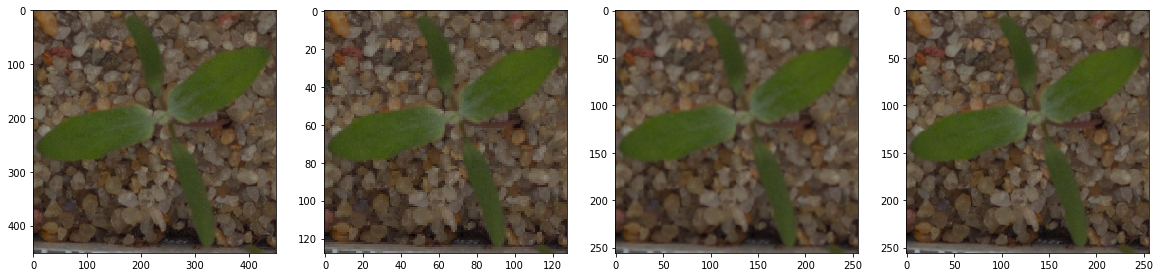

In [36]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def show_multi_images_in_one_row(imgs, titles=None, figsize=(12,6)):
    show_title = isinstance(titles, list) and len(titles) == len(imgs
                                                                )
    fig = plt.figure(figsize=figsize)
    n_cols = len(imgs)
    for i,x in enumerate(imgs):
        plt.subplot(1,n_cols, i+1)
        plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB) if x.ndim == 3 else x)
        if show_title:
            plt.title(titles[i])
            
    plt.show()
    plt.close()
    
import random
path = random.choice(grade_paths['l'])

im = cv2.imread(path)
x = cv2.resize(im, (128,128))
y = cv2.resize(x, (256,256))
z = cv2.resize(im, (256,256))
print("Original size: {}".format(im.shape))
show_multi_images_in_one_row([im, x, y, z], figsize=(20,6))

In [29]:
c = 0
for path in path_size:
    w,h = path_size[path]
    if abs(w-h) > 3:
        print(w,h)
        c +=1
print(c, len(path_size))

423 444
633 671
508 485
633 671
633 671
2218 2088
1206 1101
1367 1283
508 485
2218 2088
1206 1101
633 671
1349 1313
767 758
423 444
3652 3457
633 671
633 671
633 671
633 671
554 550
633 671
492 450
652 616
842 814
508 485
532 526
633 671
633 671
3991 3457
688 656
1206 1101
462 468
633 671
633 671
1310 1174
1134 1089
999 937
1476 1320
937 887
2835 2192
1040 936
1120 1105
1836 1782
2840 2132
1448 1374
1040 936
1949 1718
352 368
49 4750


In [43]:
import torch
import torch.nn as nn

class decoder()

x = torch.randn(1,3,224,224)
y = decoder(x)
print(y.size())

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 256, 28, 28])


torch.Size([1, 512, 7, 7])
